In [8]:
# Librerias

import os
import pandas as pd
import sys
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 


# 1. ¿El modelo mantiene un rendimiento consistente?

Primero se cargaran los resultados del modelo:

## A. Métricas de evaluación

Durante los tres primeros meses de evaluación del modelo, se observa un rendimiento estable pero moderado, con pequeñas variaciones mensuales que revelan cómo el modelo se comportó frente a los cambios en los datos, posiblemente influenciados por el inicio de la pandemia de COVID-19.

In [20]:
csv_path = os.path.join(project_root, "data", "evaluation", "metrics_by_month.csv")

df_metrics = pd.read_csv(csv_path)
df_metrics

,mes,cantidad_ejemplos,f1_score,accuracy,roc_auc,precision,recall,log_loss,balanced_accuracy
0,2020-02,100000,0.499953,0.52587,0.563651,0.615253,0.421047,0.708114,0.540963
1,2020-03,100000,0.527416,0.53700,0.573960,0.621611,0.458012,0.700765,0.548613
2,2020-04,100000,0.489733,0.56314,0.579693,0.502120,0.477943,0.685050,0.553826


Desempeño global:

- F1-score osciló entre 0.49 y 0.53, lo que indica un desempeño consistente pero limitado para equilibrar precisión y recall.

- La precisión fue más alta en febrero y marzo (~0.62), cayendo en abril a 0.50. Esto sugiere que el modelo inicialmente era más confiable al predecir propinas altas, pero perdió precisión en abril.

- El recall, por el contrario, mostró una mejora progresiva: desde 0.42 en febrero a 0.48 en abril. Es decir, el modelo comenzó a identificar más casos reales de propina alta, aunque sacrificando precisión.

- El ROC AUC también muestra una tendencia positiva, pasando de 0.56 a 0.58, lo que indica una leve mejora en la capacidad del modelo para discriminar entre clases.

- Accuracy aumentó gradualmente (0.52 → 0.56), aunque este valor puede estar sesgado por el desbalance de clases.

- El log loss disminuyó levemente con el tiempo (0.71 → 0.68), lo cual sugiere que el modelo fue más “seguro” al asignar probabilidades en abril.

---

## B. Matrices de confusión

A lo largo de los meses analizados (febrero a abril de 2020), se observa que el modelo presenta distintos comportamientos en la clasificación de propinas altas y bajas. 
- En febrero, el modelo muestra una clara tendencia a equivocarse con las propinas altas, con una alta cantidad de falsos negativos. 
- En marzo, el desempeño mejora con un mayor equilibrio entre verdaderos positivos y negativos, reflejando una mejor capacidad del modelo para identificar correctamente las propinas altas. 
- Sin embargo, en abril se revierte parcialmente esta mejora: si bien aumenta la cantidad de verdaderos negativos, también se incrementan los falsos positivos y disminuyen los verdaderos positivos, lo que sugiere que el modelo vuelve a enfocarse más en la detección de propinas bajas, reduciendo su sensibilidad hacia la clase positiva. Esta variación mensual podría estar influenciada por cambios en el comportamiento debido al inicio de la pandemia del COVID-19.


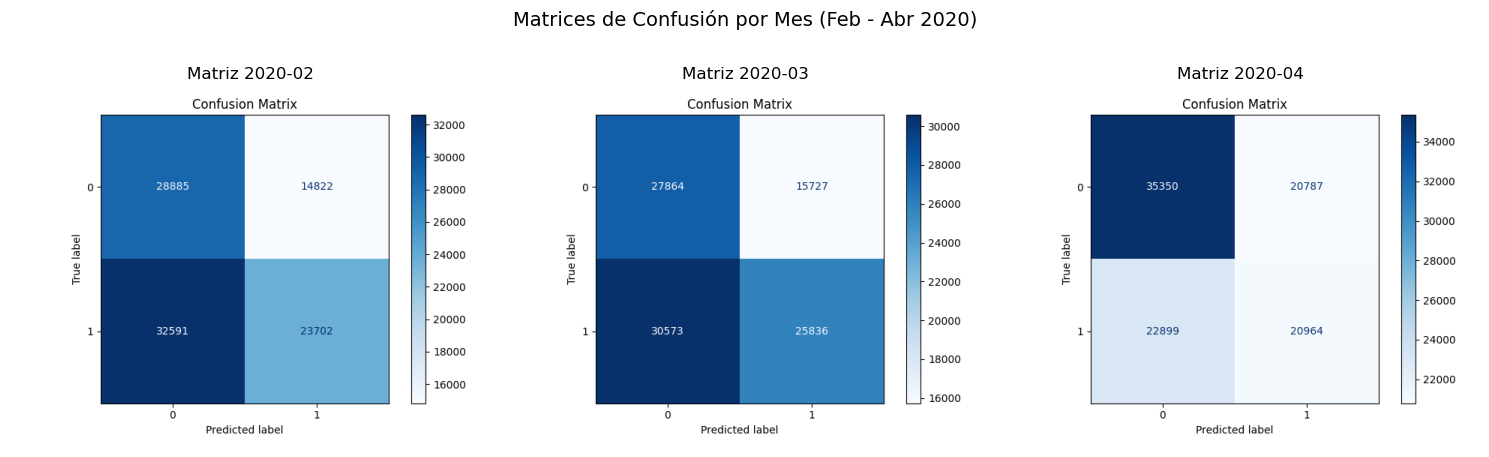

In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta desde el notebook
conf_matrix_dir = os.path.join("..", "visualization", "conf_matrix")
output_path = os.path.join("..", "visualization", "conf_matrix", "conf_matrix_consolidada.png")

# Orden explícito de los meses
meses_ordenados = ["2020-02", "2020-03", "2020-04"]
archivos_ordenados = [f"conf_matrix_{mes}.png" for mes in meses_ordenados]

# Crear figura con subplots
fig, axs = plt.subplots(1, len(archivos_ordenados), figsize=(15, 5))

for i, archivo in enumerate(archivos_ordenados):
    img_path = os.path.join(conf_matrix_dir, archivo)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Matriz {meses_ordenados[i]}")

plt.suptitle("Matrices de Confusión por Mes (Feb - Abr 2020)", fontsize=14)
plt.tight_layout()

# Guardar figura consolidada
plt.savefig(output_path, dpi=300)

# Mostrar en pantalla
plt.show()



---

## C. Curva ROC

Las curvas ROC para los meses de febrero a abril de 2020 muestran un rendimiento intermedio del modelo en la clasificación de propinas altas.
Aunque las curvas se mantienen por encima de la línea diagonal (azar), los valores del AUC son bajos: 0.56 en febrero, 0.57 en marzo y 0.58 en abril. 
Esto indica que el modelo tiene una capacidad limitada para discriminar entre propinas altas y bajas, aunque se observa una ligera mejora progresiva en su poder predictivo durante estos meses.

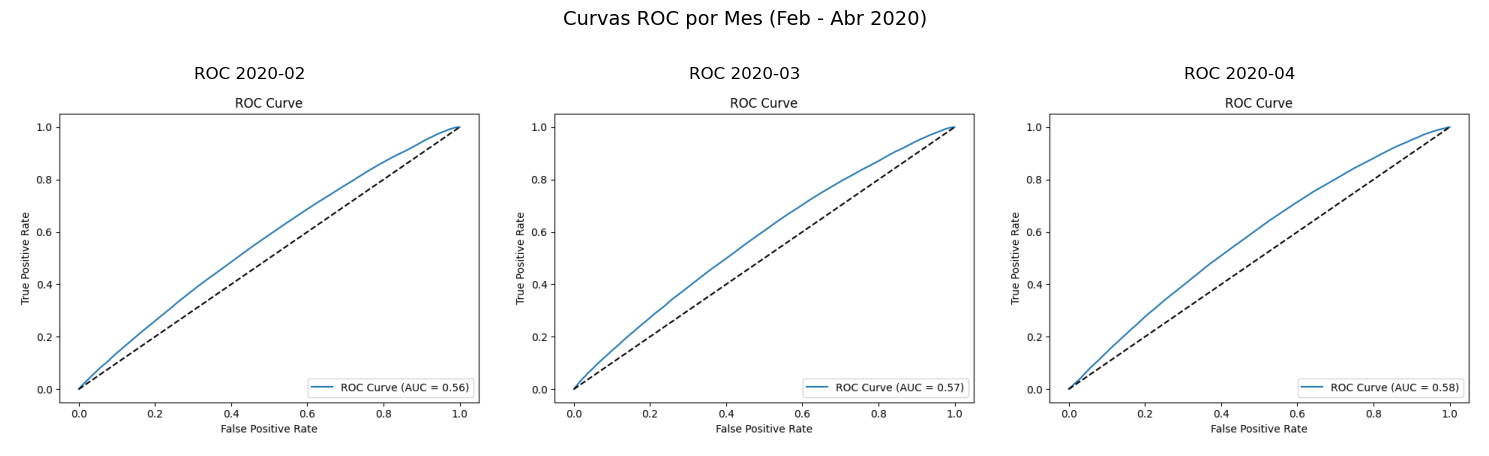

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta desde el notebook
roc_dir = os.path.join("..", "visualization", "roc_curve")
output_path = os.path.join(roc_dir, "roc_curve_consolidada.png")

# Orden explícito de los meses
meses_ordenados = ["2020-02", "2020-03", "2020-04"]
archivos_roc = [f"roc_curve_{mes}.png" for mes in meses_ordenados]

# Crear figura con subplots
fig, axs = plt.subplots(1, len(archivos_roc), figsize=(15, 5))

for i, archivo in enumerate(archivos_roc):
    img_path = os.path.join(roc_dir, archivo)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"ROC {meses_ordenados[i]}")

plt.suptitle("Curvas ROC por Mes (Feb - Abr 2020)", fontsize=14)
plt.tight_layout()

# Guardar visualización consolidada
plt.savefig(output_path, dpi=300)

# Mostrar en pantalla
plt.show()


---

## D. Exploración de los dataset originales (enero a abril 2020)

In [25]:
from src.config import TRAIN_RAW_PATH, TEST_RAW_PATH, MESES_EVALUACION

# Cargar entrenamiento crudo
train_file = os.path.join(TRAIN_RAW_PATH, "yellow_tripdata_2020-01.parquet")
df_train_raw = pd.read_parquet(train_file)
df_train_raw["origen"] = "2020-01"

# Cargar evaluación cruda por mes
df_list = [df_train_raw]
for mes in MESES_EVALUACION:
    test_file = os.path.join(TEST_RAW_PATH, f"yellow_tripdata_{mes}.parquet")
    if os.path.exists(test_file):
        df_mes = pd.read_parquet(test_file)
        df_mes["origen"] = mes
        df_list.append(df_mes)
    else:
        print(f"Archivo no encontrado: {test_file}")

# Concatenar todos los datos crudos
df_acum_crudo = pd.concat(df_list, ignore_index=True)


Preprocesamiento

In [36]:
numeric_feat = [
    "pickup_weekday",
    "pickup_hour",
    'work_hours',
    "pickup_minute",
    "passenger_count",
    'trip_distance',
    'trip_time',
    'trip_speed'
]
categorical_feat = [
    "PULocationID",
    "DOLocationID",
    "RatecodeID",
]
features = numeric_feat + categorical_feat
EPS = 1e-7

In [37]:
def preprocess(df, target_col):

   # Basic cleaning
    df = df[df['fare_amount'] > 0].reset_index(drop=True)  # avoid divide-by-zero
    # add target
    df['tip_fraction'] = df['tip_amount'] / df['fare_amount']
    df[target_col] = df['tip_fraction'] > 0.2

    # add features
    df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_minute'] = df['tpep_pickup_datetime'].dt.minute
    df['work_hours'] = (df['pickup_weekday'] >= 0) & (df['pickup_weekday'] <= 4) & (df['pickup_hour'] >= 8) & (df['pickup_hour'] <= 18)
    df['trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds
    df['trip_speed'] = df['trip_distance'] / (df['trip_time'] + EPS)

    # drop unused columns
    df = df[['tpep_dropoff_datetime'] + features + [target_col]]
    df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)

    # convert target to int32 for efficiency (it's just 0s and 1s)
    df[target_col] = df[target_col].astype("int32")

    return df.reset_index(drop=True)

In [39]:
target_col = "high_tip"

df_procesado = preprocess(df=df_acum_crudo, target_col=target_col)

In [40]:
print(f'Num rows: {len(df_procesado)}, Size: {df_procesado.memory_usage(deep=True).sum() / 1e9} GB')

Num rows: 15891584, Size: 0.889928836 GB


In [41]:
df_procesado

,tpep_dropoff_datetime,pickup_weekday,pickup_hour,work_hours,pickup_minute,passenger_count,trip_distance,trip_time,trip_speed,PULocationID,DOLocationID,RatecodeID,high_tip
0,2020-01-01 00:33:03,2.0,0.0,0.0,28.0,1.0,1.200000,288.0,0.004167,238.0,239.0,1.0,1
1,2020-01-01 00:43:04,2.0,0.0,0.0,35.0,1.0,1.200000,445.0,0.002697,239.0,238.0,1.0,1
2,2020-01-01 00:53:52,2.0,0.0,0.0,47.0,1.0,0.600000,371.0,0.001617,238.0,238.0,1.0,0
3,2020-01-01 01:00:14,2.0,0.0,0.0,55.0,1.0,0.800000,291.0,0.002749,238.0,151.0,1.0,1
4,2020-01-01 00:04:16,2.0,0.0,0.0,1.0,1.0,0.000000,138.0,0.000000,193.0,193.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891579,2020-04-30 23:39:00,3.0,23.0,0.0,30.0,-1.0,2.020000,540.0,0.003741,238.0,75.0,-1.0,0
15891580,2020-04-30 23:54:00,3.0,23.0,0.0,44.0,-1.0,3.300000,600.0,0.005500,263.0,230.0,-1.0,0
15891581,2020-04-30 23:38:00,3.0,23.0,0.0,25.0,-1.0,6.400000,780.0,0.008205,137.0,42.0,-1.0,0
15891582,2020-05-01 00:28:21,3.0,23.0,0.0,50.0,-1.0,25.700001,2275.0,0.011297,29.0,69.0,-1.0,0


In [42]:
# Crear columna de mes
df_procesado["mes"] = df_procesado["tpep_dropoff_datetime"].dt.to_period("M").astype(str)

# Calcular número de registros y porcentaje
tabla_registros = (
    df_procesado["mes"]
    .value_counts()
    .sort_index()
    .rename("n_registros")
    .reset_index()
    .rename(columns={"index": "mes"})
)
tabla_registros["porcentaje"] = 100 * tabla_registros["n_registros"] / tabla_registros["n_registros"].sum()

# Filtrar por meses de enero a abril de 2020
meses_filtrados = ["2020-01", "2020-02", "2020-03", "2020-04"]
tabla_filtrada = tabla_registros[tabla_registros["mes"].isin(meses_filtrados)].copy()

# Mostrar tabla filtrada
from tabulate import tabulate
print(tabulate(tabla_filtrada, headers="keys", tablefmt="github", floatfmt=".2f"))


|    | mes     |   n_registros |   porcentaje |
|----|---------|---------------|--------------|
|  3 | 2020-01 |       6380053 |        40.15 |
|  4 | 2020-02 |       6276456 |        39.50 |
|  5 | 2020-03 |       2998349 |        18.87 |
|  6 | 2020-04 |        236461 |         1.49 |


Si revisamos las cifras de los viajes en taxi, observamos que enero y febrero registran volúmenes similares, con más de 6 millones de viajes cada uno, lo que en conjunto representa cerca del 80% del total del dataset. En marzo, la cantidad de viajes disminuye considerablemente a aproximadamente 3 millones, y en abril se desploma de forma abrupta, alcanzando apenas los 200 mil viajes. Esta caída drástica evidencia el impacto de la pandemia del COVID-19 y las restricciones de movilidad que comenzaron a aplicarse. Esta distribución desequilibrada refleja un sesgo importante en el dataset, ya que los primeros meses muestran una realidad completamente distinta a la de abril, dificultando la capacidad del modelo para anticipar o predecir correctamente situaciones tan atípicas como las generadas por la pandemia.

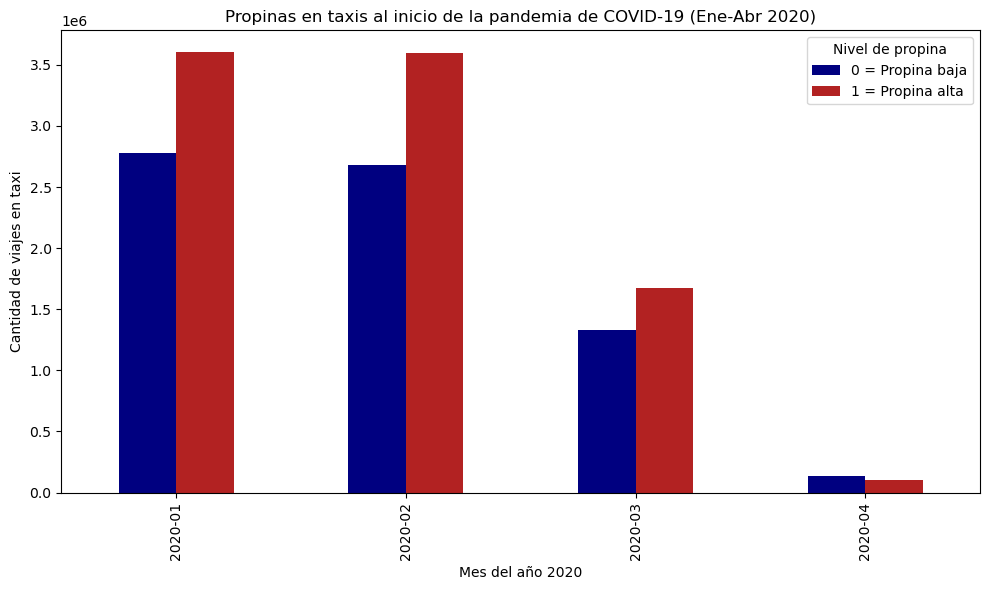

In [46]:
# Agrupar por mes y high_tip (0: baja, 1: alta)
conteo = df_procesado.groupby(["mes", "high_tip"]).size().unstack(fill_value=0)

# Filtrar de enero a abril 2020
meses_filtrados = ["2020-01", "2020-02", "2020-03", "2020-04"]
conteo_filtrado = conteo.loc[conteo.index.isin(meses_filtrados)]

# Crear carpeta si no existe
output_dir = os.path.join("..", "visualization", "analisis")
os.makedirs(output_dir, exist_ok=True)

# Graficar
ax = conteo_filtrado.plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6),
    color=["navy", "firebrick"]
)

plt.title("Propinas en taxis al inicio de la pandemia de COVID-19 (Ene-Abr 2020)")
plt.xlabel("Mes del año 2020")
plt.ylabel("Cantidad de viajes en taxi")
plt.legend(title="Nivel de propina", labels=["0 = Propina baja", "1 = Propina alta"])
plt.tight_layout()

# Guardar el gráfico
output_path = os.path.join(output_dir, "grafico_barras_evolucion_propinas_por_mes.png")
plt.savefig(output_path, dpi=300)
plt.show()



El gráfico muestra una distribución más equilibrada entre propinas altas y bajas durante los primeros tres meses de 2020, con una leve predominancia de propinas altas. Sin embargo, en abril se observa una drástica disminución en la cantidad total de viajes, lo que refleja el impacto inmediato de la pandemia.


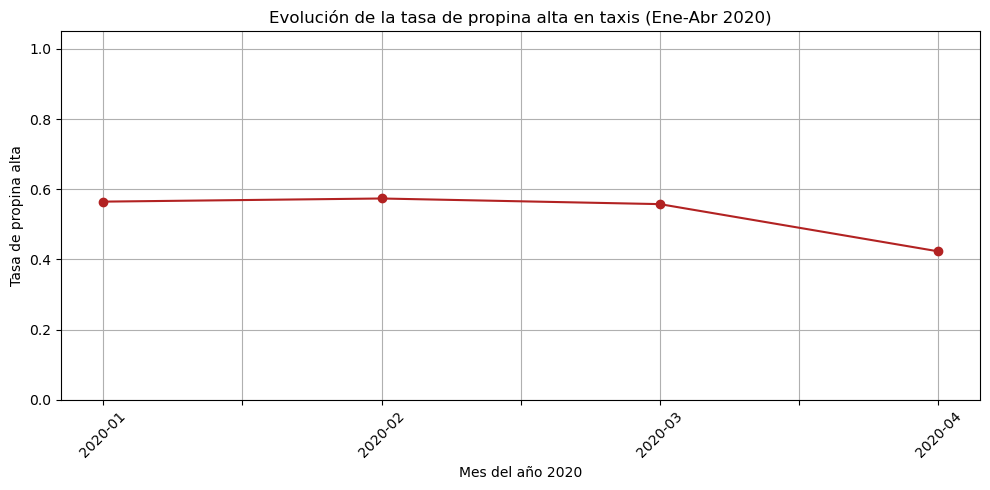

<Figure size 640x480 with 0 Axes>

In [47]:
# Calcular tasa de alta propina por mes
tasa_alta_propina = conteo_filtrado[1] / (conteo_filtrado[0] + conteo_filtrado[1])

# Graficar tasa de propina alta
plt.figure(figsize=(10, 5))
tasa_alta_propina.plot(kind='line', marker='o', color='firebrick')

# Mejorar etiquetas y estilo del gráfico
plt.title("Evolución de la tasa de propina alta en taxis (Ene-Abr 2020)")
plt.xlabel("Mes del año 2020")
plt.ylabel("Tasa de propina alta")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Guardar el gráfico
output_path = os.path.join(output_dir, "tasas_de_propinas_altas_por_mes.png")
plt.savefig(output_path, dpi=300)
plt.show()



Se puede que tasa de propinas altas, bajo drasticamente en abril de casi 60% a un 40%. Los 3 primeros meses es muy parecida la tasa con casi 60% de propinas son altas

## E. Datos entrenados y testeados (muestras de 100k)